In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [10]:
# I used http://www.gridreferencefinder.com/ to get these coordinates. I manually drew a box and made pointers for the 
# four corners of the box
exeter_coords = pd.read_csv("Exeter_box.csv", header = 0)
print(exeter_coords)

    Title     GridReference  Easting  Northing   Latitude  Longitude  \
0  Exeter  SX 91812 \n92099   291812     92099  50.718412  -3.533899   
1      TL    SX 88878 95219   288878     95219  50.745906  -3.576393   
2      TR    SX 97588 95149   297588     95149  50.746884  -3.452969   
3      BL    SX 88796 88510   288796     88510  50.685583  -3.575535   
4      BR    SX 97466 88333   297466     88333  50.685583  -3.452797   

    Postcode  
0    EX2 4EB  
1  EX5 \n5EU  
2  EX1 \n3TR  
3  EX2 \n9TW  
4  EX3 \n0PB  


In [9]:
exeter_coords[["Latitude","Longitude"]]

,Latitude,Longitude
0,50.718412,-3.533899
1,50.745906,-3.576393
2,50.746884,-3.452969
3,50.685583,-3.575535
4,50.685583,-3.452797


In [ ]:
road_coords = pd.read_csv("road_coords.csv", header = 0)

llcrnrlon =    	longitude of lower left hand corner of the desired map domain (degrees).               
llcrnrlat =   	latitude of lower left hand corner of the desired map domain (degrees).                
urcrnrlon =   	longitude of upper right hand corner of the desired map domain (degrees).               
urcrnrlat =  	latitude of upper right hand corner of the desired map domain (degrees).             

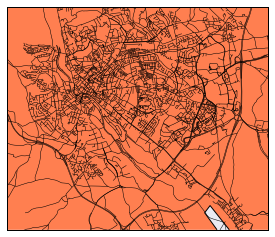

In [22]:

map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-3.57, llcrnrlat=50.68,
    urcrnrlon=-3.45, urcrnrlat=50.745)
 

map.readshapefile('/home/sophie/Documents/jobs/city_futures/england-roads-shape/roads', 'roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

In [26]:
cd /home/sophie/Documents/jobs/city_futures/devon-latest-free/

/home/sophie/Documents/jobs/city_futures/devon-latest-free


In [11]:
ls

16023_all.csv  99845_all.csv
16382_all.csv  99846_all.csv
16382.csv      AADF_Devon_VehicleFlows.csv
16971_all.csv  CP16971.csv
16972_all.csv  CP6407.csv
18081_all.csv  day2_plotting_road_markers.ipynb
18081.csv      day2_preparing_roadmarkers.ipynb
26410_all.csv  Day2_transport_trends.ipynb
37674_all.csv  Exeter_area.ipynb
37882_all.csv  Exeter_box.csv
47077_all.csv  Exeter_city_only.csv
56192_all.csv  Exeter_traffic_data_exploration2.ipynb
56414_all.csv  Exeter_traffic_data_exploration.ipynb
6407_all.csv   README.md
77996_all.csv  road_coords.csv
77997_all.csv


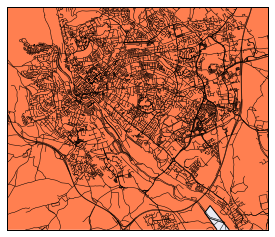

In [10]:
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-3.57, llcrnrlat=50.68,
    urcrnrlon=-3.45, urcrnrlat=50.745)
 

map.readshapefile('/home/sophie/Documents/jobs/city_futures/devon-latest-free/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'coral')
map.drawmapboundary()

Also tried plotting traffic, places but they did not give anything as clear as the road shapefile

In [15]:
# read in my new points which tells which roads we have
road_coords = pd.read_csv("road_coords.csv", header = 0)

In [24]:
print(road_coords[["Latitude","Longitude"]][0:10])



    Latitude  Longitude
0  50.691292  -3.506076
1  50.691999  -3.504317
2  50.693032  -3.502729
3  50.696702  -3.498137
4  50.696023  -3.499639
5  50.695452  -3.500926
6  50.694908  -3.501785
7  50.694419  -3.501999
8  50.727546  -3.462539
9  50.720645  -3.462453


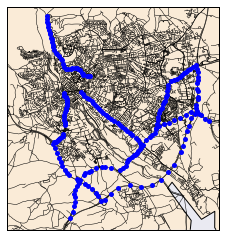

In [43]:
 
map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.2,
    llcrnrlon=-3.57, llcrnrlat=50.67,
    urcrnrlon=-3.45, urcrnrlat=50.75)

map.readshapefile('/home/sophie/Documents/jobs/city_futures/devon-latest-free/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'antiquewhite')
map.drawmapboundary()

lat = road_coords["Latitude"].tolist()
lon = road_coords["Longitude"].tolist()
x,y = map(lon, lat)
map.plot(x, y, 'bo', markersize=5)


fig = plt.gcf()
plt.show()
fig.savefig('Exeter_test.png', dpi=100)



In [38]:
plt.savefig('Exeter_test.png')

In [29]:
# import just the Exeter data
exeter_data = pd.read_csv("Exeter_city_only.csv", header = 0)

In [45]:
# import my normalised coordinate data
road_coords = pd.read_csv("road_coords_norm_vals.csv", header = 0)

In [53]:
CP = 6407
road_coords["PedalCycles%"][road_coords["CP"] == CP].tolist()[0]

0.23337515683814306

#### Make the plots again, but this time with different-sized markers depending on how large the AADF is.

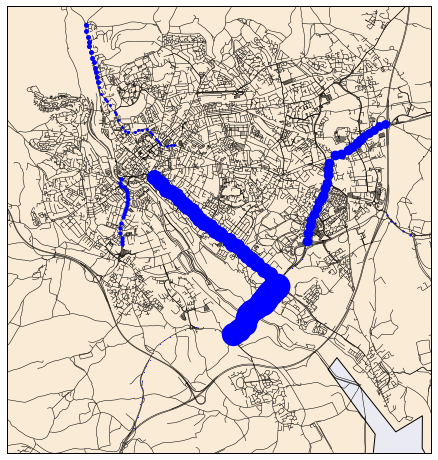

In [62]:

fig = plt.figure(figsize=(8,8))

map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.2,
    llcrnrlon=-3.57, llcrnrlat=50.67,
    urcrnrlon=-3.45, urcrnrlat=50.75)

map.readshapefile('/home/sophie/Documents/jobs/city_futures/devon-latest-free/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'antiquewhite')
map.drawmapboundary()

for CP in road_coords["CP"].unique():
    
    lat = road_coords["Latitude"][road_coords["CP"] == CP].tolist()
    lon = road_coords["Longitude"][road_coords["CP"] == CP].tolist()
    x,y = map(lon, lat)
    
    markersize = road_coords["PedalCycles%"][road_coords["CP"] == CP].tolist()[0]
    
    map.plot(x, y, 'bo', markersize=markersize*100)
    
fig = plt.gcf()
plt.show()
fig.savefig('Exeter_cylists.png', dpi=100)

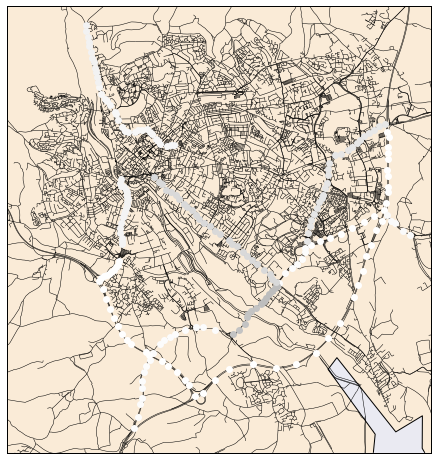

In [67]:
fig = plt.figure(figsize=(8,8))

map = Basemap(projection='merc', lat_0 = 57, lon_0 = -135,
    resolution = 'h', area_thresh = 0.2,
    llcrnrlon=-3.57, llcrnrlat=50.67,
    urcrnrlon=-3.45, urcrnrlat=50.75)

map.readshapefile('/home/sophie/Documents/jobs/city_futures/devon-latest-free/roads', 'osm_roads')    
    
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'antiquewhite')
map.drawmapboundary()

for CP in road_coords["CP"].unique():
    
    lat = road_coords["Latitude"][road_coords["CP"] == CP].tolist()
    lon = road_coords["Longitude"][road_coords["CP"] == CP].tolist()
    x,y = map(lon, lat)
    
    markersize = road_coords["PedalCycles%"][road_coords["CP"] == CP].tolist()[0]
    
    map.plot(x, y, 'bo', c = str(1-markersize))